In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read in all the data
df = pd.read_csv(r"/content/wine-quality-white-and-red.csv")

# Data Understanding

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6030,red,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.6,7
2472,white,8.8,0.24,0.23,10.3,0.032,12.0,97.0,0.99571,3.13,0.40,10.7,6
2348,white,8.3,0.26,0.31,2.0,0.029,14.0,141.0,0.99077,2.95,0.77,12.2,6
2244,white,7.0,0.36,0.14,11.6,0.043,35.0,228.0,0.99770,3.13,0.51,8.9,5
5335,red,11.1,0.45,0.73,3.2,0.066,6.0,22.0,0.99860,3.17,0.66,11.2,6


In [ ]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Conclusion: There are columns with object, float, and int data type.The object data type should be converted to int or float data type to be prepared for modelling

In [ ]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
print(df['quality'].mode())

0    6
Name: quality, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.shape

(6497, 13)

Conclusion: The dataset consists of 6497 rows and 13 columns

In [ ]:
# show all available columns
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
# check if got redundancy in columns
print(df.columns.tolist())

['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


Conclusion: There are no columns redundancy

In [ ]:
# check for missing value
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Conclusion: There are no missing values

In [ ]:
# # access the data values fitted in the particular row or column based on the index value passed to the function
# print(df.loc[[2926]])

In [ ]:
# print(df.loc[[3326]])

Conclusion: [Columns] have missing values, impute is required

In [ ]:
# Renaming columns for better understanding
df.rename(columns = {'quality' : 'quality score'}, inplace = True)

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality score
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality score'],
      dtype='object')

In [ ]:
df.agg({
        'fixed acidity': ['mean', 'median', 'min', 'max', 'std', 'skew'],
        'volatile acidity': ['mean', 'median', 'min', 'max', 'std', 'skew'],
        'citric acid': ['mean', 'median', 'min', 'max', 'std', 'skew'],
        'residual sugar': ['mean', 'median', 'min', 'max', 'std', 'skew'],
        'chlorides': ['mean', 'median', 'min', 'max', 'std', 'skew'],
        'free sulfur dioxide': ['mean', 'median', 'min', 'max', 'std', 'skew'],
        'total sulfur dioxide': ['mean', 'median', 'min', 'max', 'std', 'skew'],
        'density': ['mean', 'median', 'min', 'max', 'std', 'skew'],
        'pH': ['mean', 'median', 'min', 'max', 'std', 'skew'],
        'sulphates': ['mean', 'median', 'min', 'max', 'std', 'skew'],
        'alcohol': ['mean', 'median', 'min', 'max', 'std', 'skew']
    })

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
median,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
skew,1.723290,1.495097,0.471731,1.435404,5.399828,1.220066,-0.001177,0.503602,0.386839,1.797270,0.565718


<ipython-input-23-8cde6c884207>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality score'}>]], dtype=object)

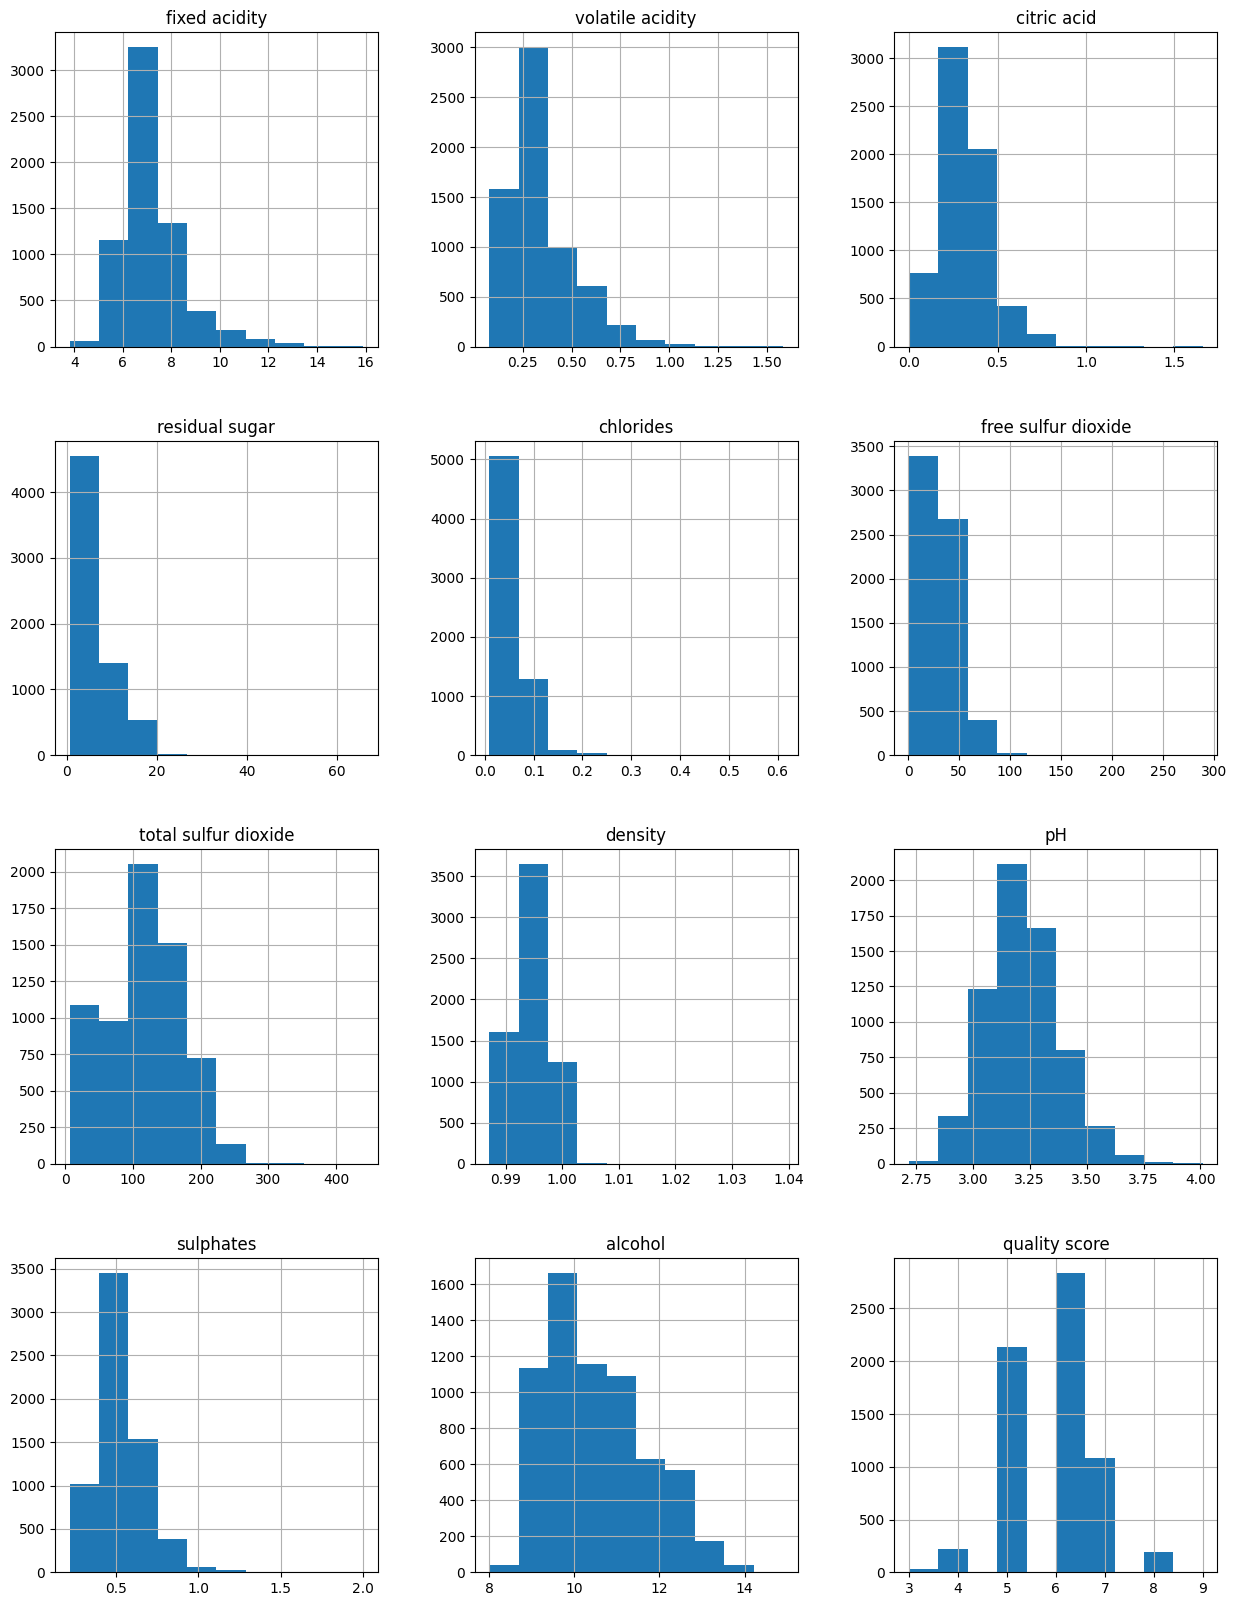

In [ ]:
fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
df.hist(ax = ax)

# Data Cleaning

## Summary (Before) 

In [ ]:
table = pd.DataFrame({
    "No. Unique" : df.nunique(),
    'NaN Value': df.isna().sum(),
    'Duplicated' : df.duplicated().sum(),
    'Dtype': df.dtypes
})

table

,No. Unique,NaN Value,Duplicated,Dtype
type,2,0,1177,object
fixed acidity,106,0,1177,float64
volatile acidity,187,0,1177,float64
citric acid,89,0,1177,float64
residual sugar,316,0,1177,float64
chlorides,214,0,1177,float64
free sulfur dioxide,135,0,1177,float64
total sulfur dioxide,276,0,1177,float64
density,998,0,1177,float64
pH,108,0,1177,float64


## Check for duplicates

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality score
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Conclusion: It is shown that row 3 and row 4 are duplicated

In [ ]:
# Check for duplicates
df.duplicated(keep = 'first')

0       False
1       False
2       False
3       False
4        True
        ...  
6492    False
6493    False
6494     True
6495    False
6496    False
Length: 6497, dtype: bool

Conclusion: The keep parameter with the value 'first' considers first value as unique and rest of the same values as duplicate

In [ ]:
duplicate_df = df[df.duplicated(keep = 'first')]

duplicate_df.shape

(1177, 13)

Conclusion: There are 1177 duplicated rows

In [ ]:
duplicate_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality score
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
20,white,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,red,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,red,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
# Check for duplicated rows, keep the last occurrence as True, and mark the first occurrence as False

df = df.drop_duplicates(keep = 'first')

In [ ]:
df.shape

(5320, 13)

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality score
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


Conclusion: There are no duplicate rows

## Check for missing values

In [ ]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality score           0
dtype: int64

Conclusion: All the columns have no missing values

## Summary (After)

In [ ]:
table = pd.DataFrame({
    "No. Unique" : df.nunique(),
    'NaN Value': df.isna().sum(),
    'Duplicated' : df.duplicated().sum(),
    'Dtype': df.dtypes
})

table

,No. Unique,NaN Value,Duplicated,Dtype
type,2,0,0,object
fixed acidity,106,0,0,float64
volatile acidity,187,0,0,float64
citric acid,89,0,0,float64
residual sugar,316,0,0,float64
chlorides,214,0,0,float64
free sulfur dioxide,135,0,0,float64
total sulfur dioxide,276,0,0,float64
density,998,0,0,float64
pH,108,0,0,float64


## Data Balancing

### Check for imbalance target 

[Text(0, 0, '30'),
 Text(0, 0, '206'),
 Text(0, 0, '1752'),
 Text(0, 0, '2323'),
 Text(0, 0, '856'),
 Text(0, 0, '148'),
 Text(0, 0, '5')]

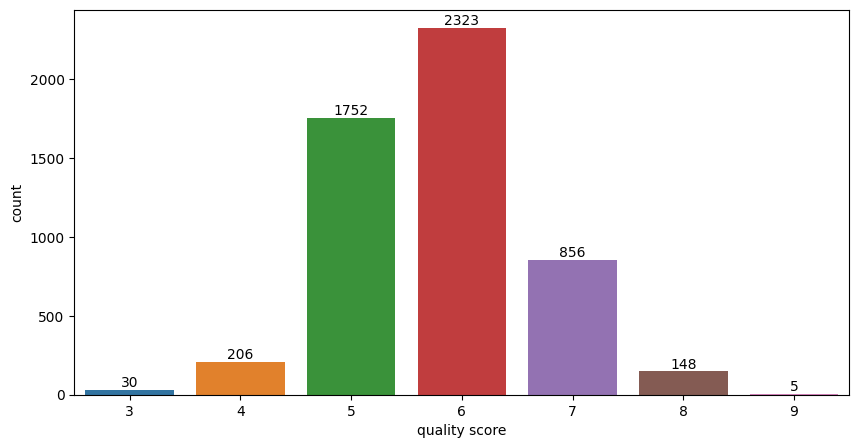

In [ ]:
ax = plt.figure(figsize = (10, 5))
ax = sns.countplot(x = 'quality score', data = df)
ax.bar_label(ax.containers[0])

Conclusion: Quality score of 6 has the most occurence, followed by 5, 7, 4, 8, 3, and 9

###  Undersample target

Undersampling is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

In [ ]:
# # Shuffle the dataset
# shuffled_df = df.sample(frac = 1, random_state = 4)

# # Put all the Failure = 'Yes' in a separate dataset
# fail_df = shuffled_df.loc[shuffled_df['Failure'] == 'Yes']

# # Randomly select 1000 observations from Failure = 'No' (majority class)
# no_fail_df = shuffled_df.loc[shuffled_df['Failure'] == 'No'].sample(n = 339, random_state = 42)

# # Concatenate both dataframes again
# new_df = pd.concat([fail_df, no_fail_df])

In [ ]:
# # plot dataset after undersampling

# # plt.figure(figsize = (8, 8))
# # sns.countplot(x = new_df['Failure'])
# # plt.title('Balanced Classes', fontweight = 'bold')
# # plt.show()

# ax = plt.figure(figsize = (8, 8))
# ax = sns.countplot(x = 'Failure', data = new_df)
# ax.bar_label(ax.containers[0])

In [ ]:
# # Display class counts
# new_df['Failure'].value_counts()

In [ ]:
# new_df.info()

In [ ]:
# new_df.shape

# Data Visualization 

## EDA 

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data: 
- to discover patterns
- to spot anomalies
- to test hypothesis 
- to check assumptions 

with the help of summary statistics and graphical representations

In [ ]:
# remove:
# new_df = df

### Type vs Quality Score

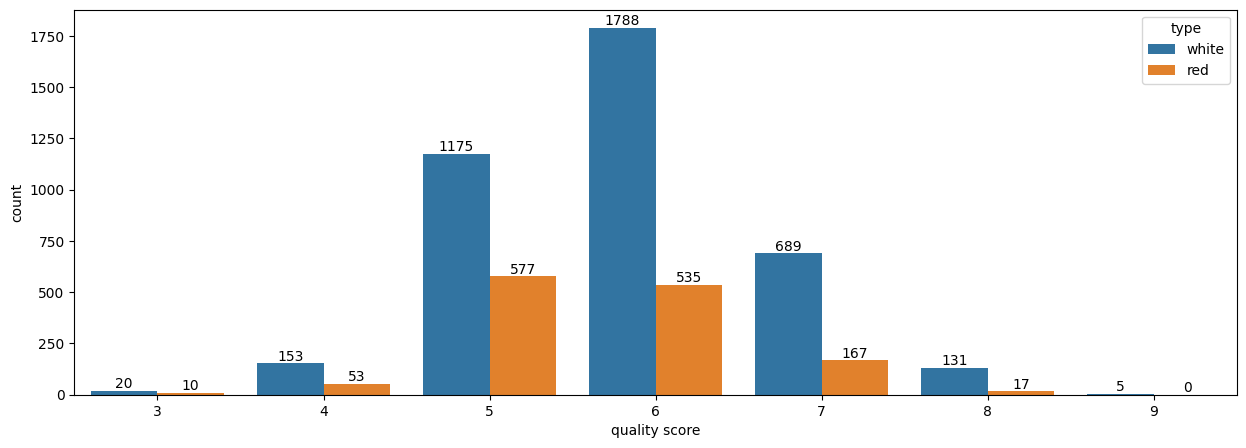

In [ ]:
ax = plt.figure(figsize = (15, 5))
ax = sns.countplot(x = 'quality score', hue = 'type', data = df)
for container in ax.containers:
    ax.bar_label(container)

Conclusion: Type affects Quality Score
- White wine is most likely to have higher quality score

Research:
- White wine had a higher mean quality of 5.88 as compared to Red wine which had a mean quality of 5.64

In [ ]:
df['type'].value_counts()

white    3961
red      1359
Name: type, dtype: int64

### Fixed Acidity vs Quality Score

<Axes: xlabel='quality score', ylabel='fixed acidity'>

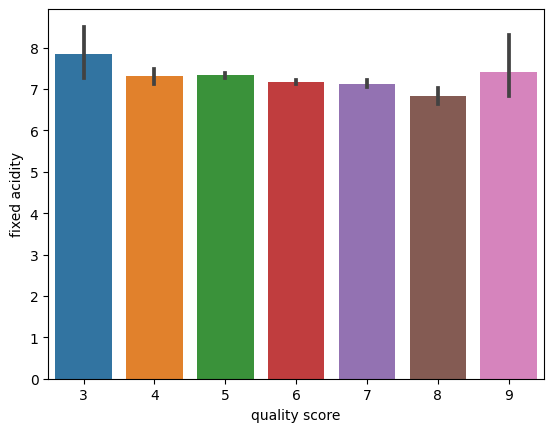

In [ ]:
sns.barplot(x=df['quality score'], y=df['fixed acidity'])

<Axes: xlabel='fixed acidity'>

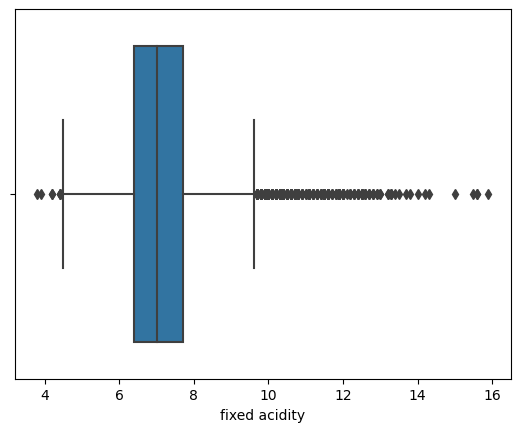

In [ ]:
sns.boxplot(x = 'fixed acidity', hue = 'quality score', data = df)

Conclusion: Fixed Acidity affects Quality Score
- Outliers are identified

Research:
- A wine with a higher acidity (lower pH number) will taste crisper and tarter on the palate. A wine with a lower acidity will taste richer and rounder on the palate.
- The range for fixed acidity is quite high with minimum being 4.8 and maximum being 14.2

### Volatile Acidity vs Quality Score

<Axes: xlabel='quality score', ylabel='volatile acidity'>

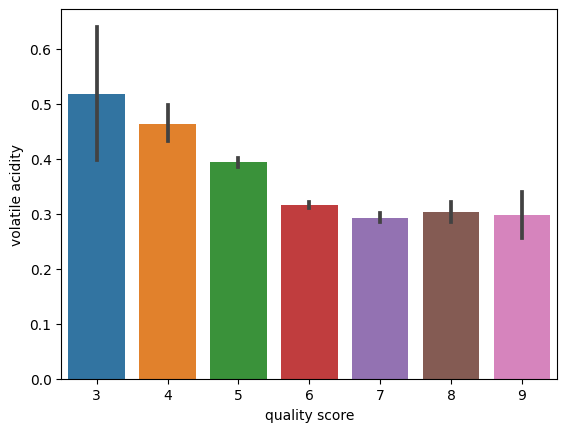

In [ ]:
sns.barplot(x=df['quality score'], y=df['volatile acidity'])

<Axes: xlabel='volatile acidity'>

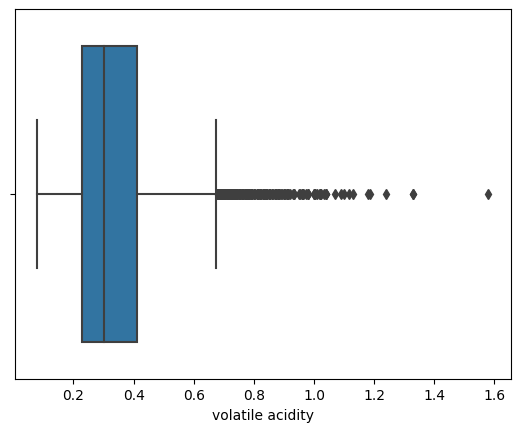

In [ ]:
sns.boxplot(x = 'volatile acidity', hue = 'quality score', data = df)

Conclusion: Volatile Acidity affects Quality Score
- Outliers are identified 
- The lower the volatile acidity, the higher the quality score

Research:
- As long as the volatile acidity does not exceed 0.55 or 0.60 gr/litre, the taste of the wine will not be affected too much
- The quality of a wine is higher when its volatile acidity is lower

### Citric Acid vs Quality Score

<Axes: xlabel='quality score', ylabel='citric acid'>

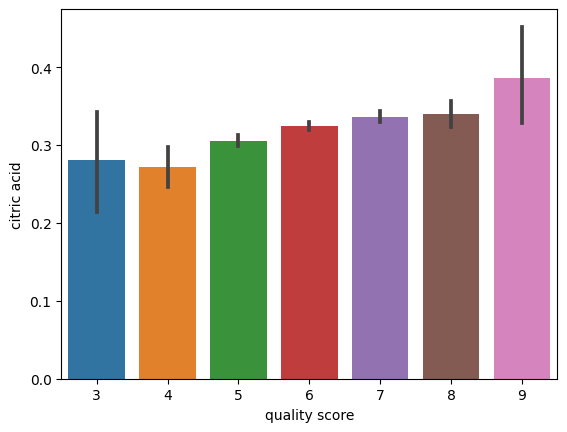

In [ ]:
sns.barplot(x=df['quality score'], y=df['citric acid'])

<Axes: xlabel='citric acid'>

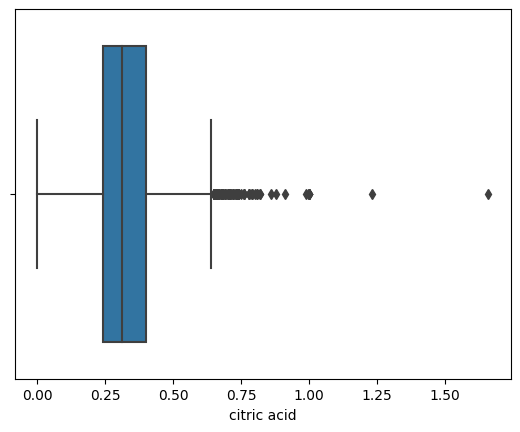

In [ ]:
sns.boxplot(x = 'citric acid', hue = 'quality score', data = df)

Conclusion: Citric Acid affects Quality Score
- Outliers are identified
- The higher the citric acidity, the higher the quality score

Research:
- Citric acid is added to wines to increase acidity
- It can be added to finished wines to increase acidity and give a "fresh" flavor that is preferable for tasters to get better quality score

### Residual Sugar vs Quality Score

<Axes: xlabel='quality score', ylabel='residual sugar'>

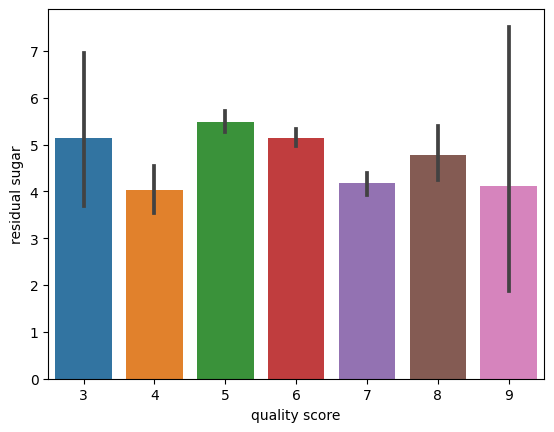

In [ ]:
sns.barplot(x=df['quality score'], y=df['residual sugar'])

<Axes: xlabel='residual sugar'>

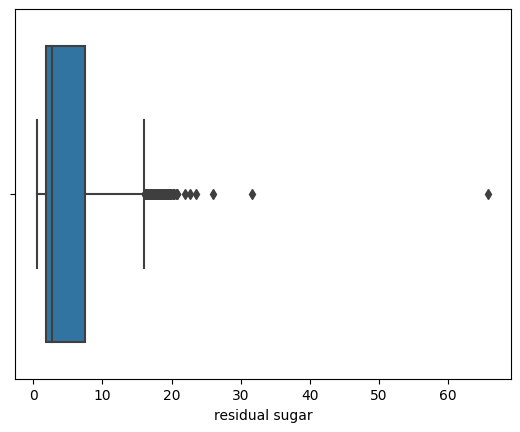

In [ ]:
sns.boxplot(x = 'residual sugar', hue = 'quality score', data = df)

Conclusion: Residual Sugar affects Quality Score
- Outliers are identified

Research:
- The amount of residual sugar affects a wine's sweetness
- The more residual sugar remaining in a wine, the sweeter the wine is
- Residual sugar is from the natural grape sugars left in a wine after the alcoholic fermentation finishes

### Chlorides vs Quality Score

<Axes: xlabel='quality score', ylabel='chlorides'>

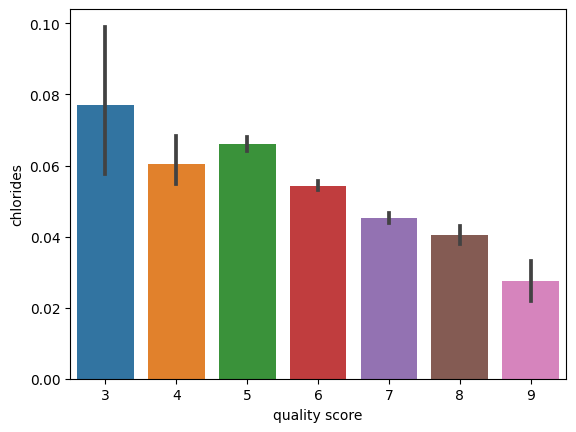

In [ ]:
sns.barplot(x=df['quality score'], y=df['chlorides'])

<Axes: xlabel='chlorides'>

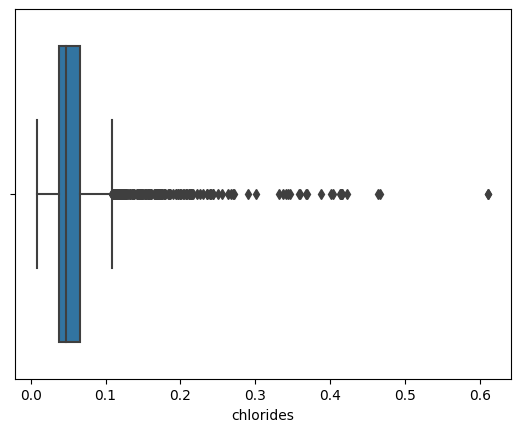

In [ ]:
sns.boxplot(x = 'chlorides', hue = 'quality score', data = df)

Conclusion: Chlorides affects Quality Score
- Outliers are identified
- The lower the chlorides, the higher the quality score

Research:
- In wines, the concentration of chloride ions is generally indicative of the presence of sodium chloride5
- Sodium chloride adds to the saltiness of a wine, which can contribute to or detract from the overall taste and quality of the wine

### Free Sulfur Dioxide vs Quality Score

<Axes: xlabel='quality score', ylabel='free sulfur dioxide'>

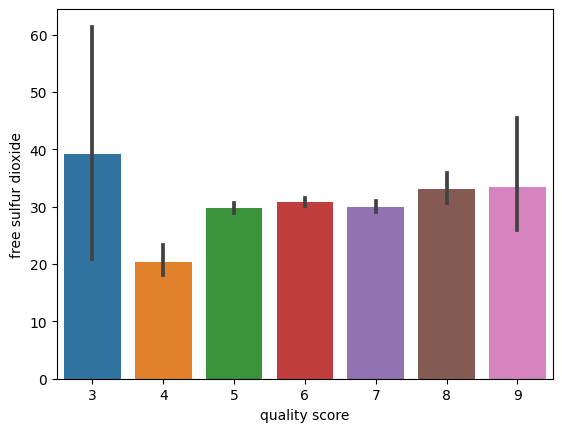

In [ ]:
sns.barplot(x=df['quality score'], y=df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide'>

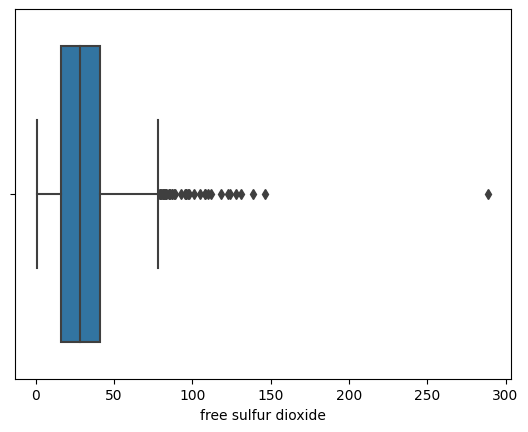

In [ ]:
sns.boxplot(x = 'free sulfur dioxide', hue = 'quality score', data = df)

Conclusion: Free Sulfur Dioxide affects Quality Score

- Outliers are identified

Research:
- Free Sulfur Dioxide improves the taste and retains the wine's fruity flavors and freshness of aroma

### Total Sulfur Dioxide vs Quality Score

<Axes: xlabel='quality score', ylabel='total sulfur dioxide'>

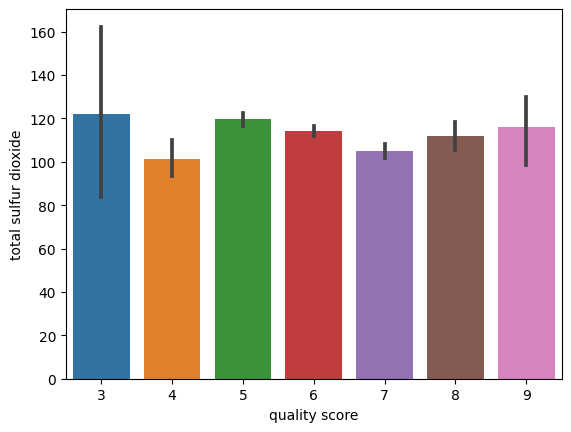

In [ ]:
sns.barplot(x=df['quality score'], y=df['total sulfur dioxide'])

<Axes: xlabel='total sulfur dioxide'>

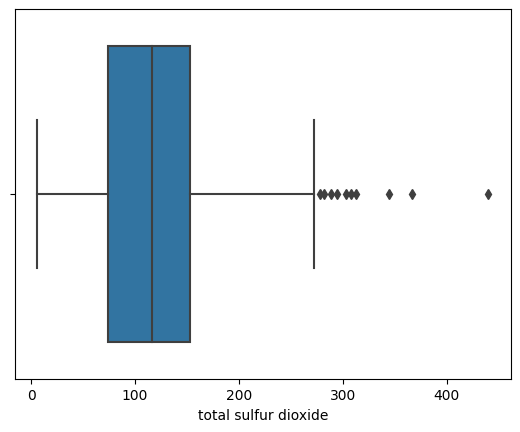

In [ ]:
sns.boxplot(x = 'total sulfur dioxide', hue = 'quality score', data = df)

Conclusion: Total Sulfur Dioxide affects Quality Score
- Outliers are identified

Research:
- Total Sulfur Dioxide protects wine from various unwanted reactions 
- It is indispensable additive in winemaking
- It preserves wine's freshness and fruit characters

### Density vs Quality Score

<Axes: xlabel='quality score', ylabel='density'>

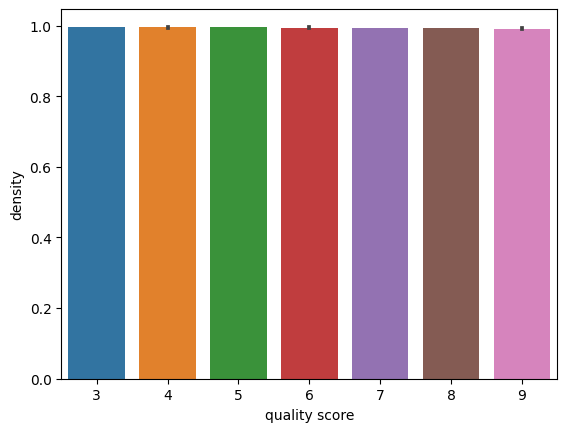

In [ ]:
sns.barplot(x=df['quality score'], y=df['density'])

<Axes: xlabel='density'>

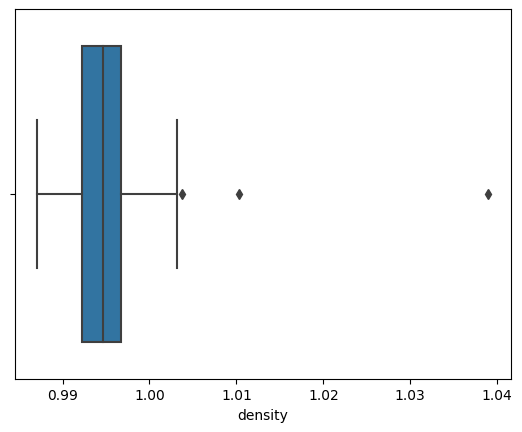

In [ ]:
sns.boxplot(x = 'density', hue = 'quality score', data = df)

Conclusion: Density affects Quality Score
- Outliers are identified

Research:
- Density has little effect on the quality of wines
- Density is greatly affected by acidity, alcohol, sugar, and SO2 content
- Wines with a lower density tend to have better quality

### pH vs Quality Score

<Axes: xlabel='quality score', ylabel='pH'>

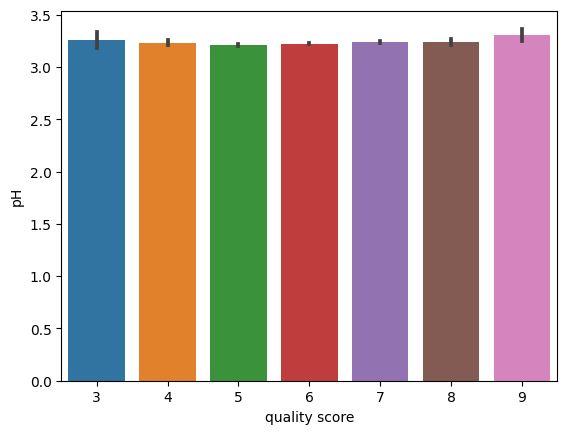

In [ ]:
sns.barplot(x=df['quality score'], y=df['pH'])

<Axes: xlabel='pH'>

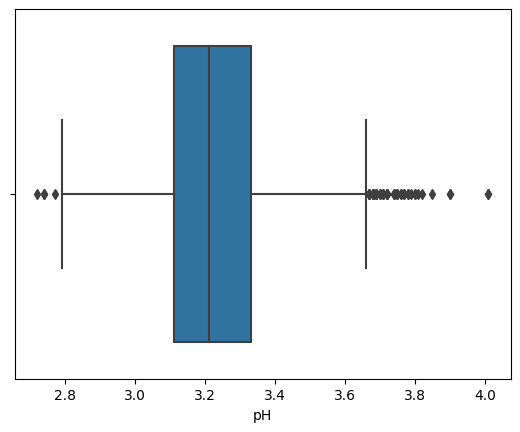

In [ ]:
sns.boxplot(x = 'pH', hue = 'quality score', data = df)

Conclusion: pH affects Quality Score
- Outliers are identified

Research:
- Winemakers use pH as a way to measure ripeness in relation to acidity
- Low pH wines will taste tart and crisp, while higher pH wines are more susceptible to bacterial growth
- Most wine pH's fall around 3 to 3.5; about 3.0 to 3.4 is desirable for white wines, while about 3.3 to 3.6 is best for reds

### Sulphates vs Quality Score

<Axes: xlabel='quality score', ylabel='sulphates'>

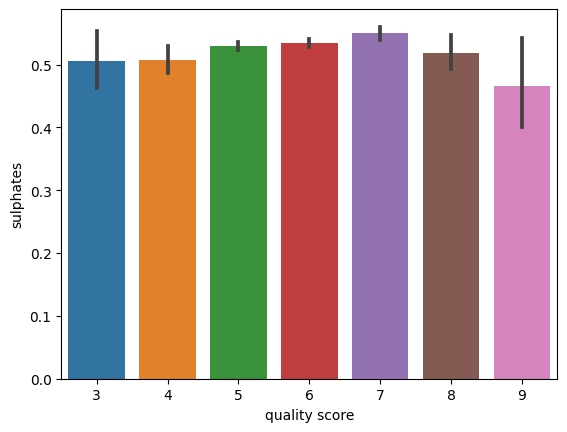

In [ ]:
sns.barplot(x=df['quality score'], y=df['sulphates'])

<Axes: xlabel='sulphates'>

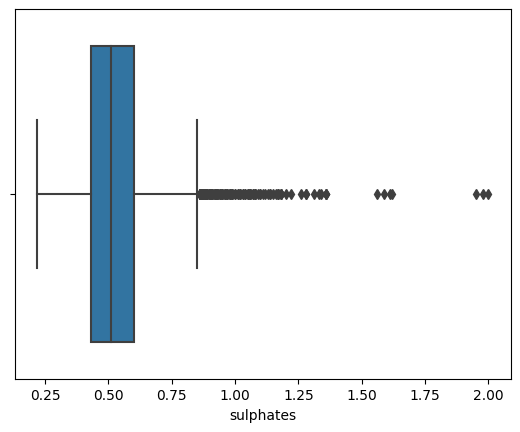

In [ ]:
sns.boxplot(x = 'sulphates', hue = 'quality score', data = df)

Conclusion: Sulphates affects Quality Score
- Outliers are identified

Research:
- Wine is fermented using yeast, which produces sulfites, so almost all wine contains sulfites
- Protecting against oxidation, which can affect the color and taste of wine
- Higher sulfurous content causes a duller taste in wine
- High potency of sulfite ions presents a health risk and speeds up the wine's fermentation process

### Alcohol vs Quality Score

<Axes: xlabel='quality score', ylabel='alcohol'>

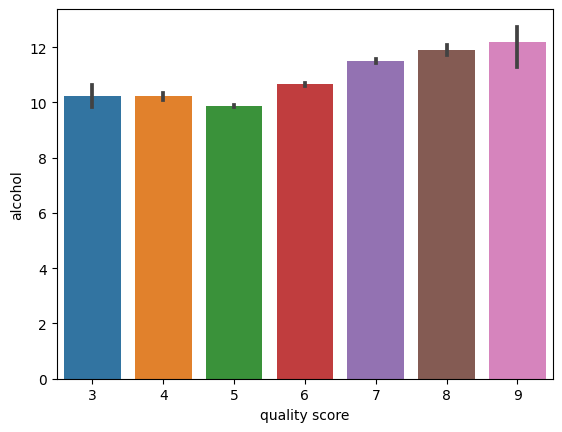

In [ ]:
sns.barplot(x=df['quality score'], y=df['alcohol'])

<Axes: xlabel='alcohol'>

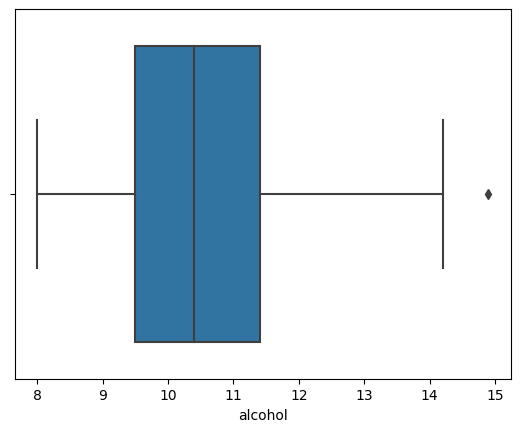

In [ ]:
sns.boxplot(x = 'alcohol', hue = 'quality score', data = df)

Conclusion: Alcohol affects Quality Score
- Outlier is identified

Research:
- Alcohol content affects a wine's body
- A wine with higher alcohol content will have a fuller, richer body, while a lower alcohol wine will taste lighter and more delicate on the palate
- Alcohol also adds viscosity and helps balance sweetness and acidity

### Correlation heatmap 

<ipython-input-65-23b98389ed98>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


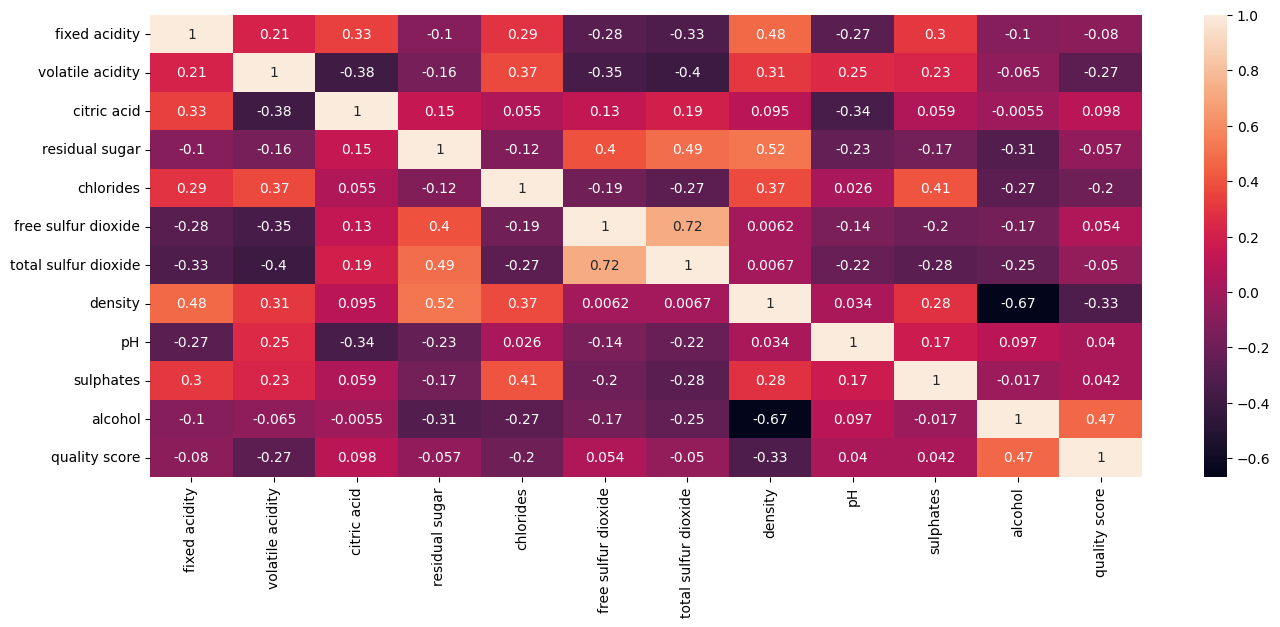

In [ ]:
# Correlation between different variables
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

Conclusion: fixed acidity, volatile acidity, residual sugar, chlorides, total sulfur dioxide, and density have weak correlations with quality score

### Remove columns

In [ ]:
df.shape

(5320, 13)

In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality score'],
      dtype='object')

In [ ]:
# cols = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density']
# df = df.drop(columns = cols, axis = 1)
# df.head()

Drop unrelated columns
- Pick unlogical/unaffected/unrelated columns towards Quality score target and drop them
- Drop fixed acidity, volatile acidity, residual sugar, chlorides, total sulfur dioxide, density columns/attributes because they does not show clear effect on target value in this dataset and have negative relationship to the target value

In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality score'],
      dtype='object')

In [ ]:
df.shape

(5320, 13)

# Data Modelling

## Impute data type

### Using Label Encoding for Type attribute

Label encoding is known to assign the categorical value with an integer value according to alphabetical order starting from the value 0

In [ ]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality score             int64
dtype: object

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality score
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [ ]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['type']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.dtypes

type                      int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality score             int64
dtype: object

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality score
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [ ]:
df['type'].unique()

array([1, 0])

## Define features (X) & target (Y)

In [ ]:
# Label: target = Y, features = X
# features affect target
# features - independent variable that will affect the target
# target - dependent variable 
# w/o X cannot predict Y

# Separating target variable from features

Y = df['quality score']
X = df.drop(columns = 'quality score')

## Data Splitting

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# features divide to X_train & X_test
# target divide to y_train & y_test
# 70% train, 30% test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 12345)

In [ ]:
X_train.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1705,1,6.6,0.250,0.31,1.5,0.035,32.0,127.0,0.9921,3.41,0.47,11.3
5745,0,7.4,0.680,0.16,1.8,0.078,12.0,39.0,0.9977,3.50,0.70,9.9
5198,0,7.5,0.530,0.06,2.6,0.086,20.0,44.0,0.9965,3.38,0.59,10.7
1661,1,6.7,0.260,0.49,8.3,0.047,54.0,191.0,0.9954,3.23,0.40,10.3
5388,0,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.9984,3.31,0.67,10.6


In [ ]:
X_test.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
6127,0,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5
225,1,7.1,0.240,0.41,17.8,0.046,39.0,145.0,0.99980,3.32,0.39,8.7
1301,1,6.9,0.200,0.40,7.7,0.032,51.0,176.0,0.99390,3.22,0.27,11.4
6335,0,6.8,0.915,0.29,4.8,0.070,15.0,39.0,0.99577,3.53,0.54,11.1
4083,1,6.2,0.300,0.32,1.2,0.052,32.0,185.0,0.99266,3.28,0.44,10.1


## Pipeline undersampling and oversampling

- Undersamples the majority classes & oversamples the minority classes
- Define a threshold which splits majority & minority classes
- Define the number of desired samples for each class
- Threshold = the number of desired samples for each class
- Set the threshold to the median value of the number of samples in the classes

In [ ]:
# calculate the median & convert it to integer
count = y_train.value_counts()
# n_samples = count.median().astype(np.int64)
n_samples = int(count.median())

### Undersample the most represented classes

Undersampling is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class

In [ ]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# define a utility function
def sampling_strategy(X,y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

#### Perform undersampling of the majority classes

In [ ]:
# exploit the imblearn library
from imblearn.under_sampling import ClusterCentroids
under_sampler = ClusterCentroids(sampling_strategy=sampling_strategy(X_train,y_train,n_samples,t='majority'))
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

### Oversample the less represented classes

#### Exploit the SMOTE oversampling strategy

In [ ]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, y_under,n_samples, t='minority'),k_neighbors=2)
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

Class=3, n=144 (14.286%)
Class=4, n=144 (14.286%)
Class=5, n=144 (14.286%)
Class=6, n=144 (14.286%)
Class=7, n=144 (14.286%)
Class=8, n=144 (14.286%)
Class=9, n=144 (14.286%)


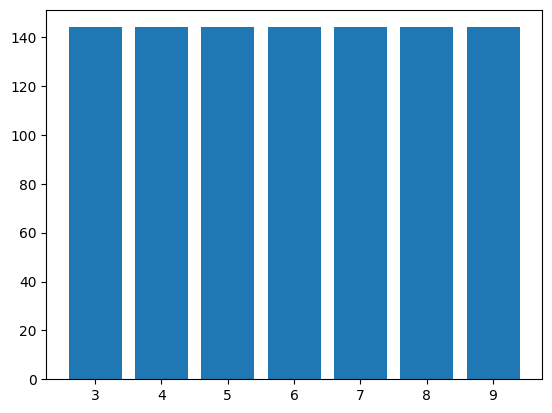

In [ ]:
from collections import Counter
# summarize distribution
counter = Counter(y_bal)
for k,v in counter.items():
 per = v / len(y_bal) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
X_train.shape

(3724, 12)

In [ ]:
y_train.shape

(3724,)

In [ ]:
X_test.shape

(1596, 12)

In [ ]:
y_test.shape

(1596,)

In [ ]:
y_train.head()

1705    6
5745    6
5198    6
1661    6
5388    6
Name: quality score, dtype: int64

In [ ]:
y_test.head()

6127    5
225     5
1301    5
6335    5
4083    5
Name: quality score, dtype: int64

In [ ]:
# standardize the data to reduce the chance of bias outcome of predictions 
# in terms of misclassification error and accuracy rates
# only standardise features (X) using standard scaler 
# model will learn from standardise value to give correct output on Y based on X
# so that it will provide better learning for model
# standard scaler - standardize bcoz it will giv the correct distribution

# standard scaler - change to a standard range

# To standardize the features
# To get a normal distribution
# Cannot standardize target because will not get accurate output

sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.58685972 -0.46652711 -0.5518776  ...  1.14478576 -0.42409862
   0.6291898 ]
 [-1.70398472  0.14645585  1.98354045 ...  1.70420954  1.10678874
  -0.55343748]
 [-1.70398472  0.22307872  1.09909229 ...  0.95831116  0.37462522
   0.12234954]
 ...
 [ 0.58685972  1.14255317 -0.19809834 ... -1.65233315  2.3048745
  -1.56711801]
 [ 0.58685972 -0.2366585   0.5684234  ... -0.1605364  -0.75690022
   1.3894502 ]
 [-1.70398472  1.14255317  2.04250366 ...  0.83399477 -0.55721926
  -0.97580437]]


In [ ]:
X_train.max()

14.501405663265476

In [ ]:
X_train.min()

-3.144129896461422

In [ ]:
X_train.mean()

1.2120630313952836e-15

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# fit the split data into the model to make them learn based on the model
random_forest_model = RandomForestClassifier(random_state = 12345)
random_forest_model.fit(X_train, y_train)

# random_forest_model = RandomForestClassifier(max_depth = 3, random_state = 12345)
# random_forest_model.fit(X_train, y_train)

# random_forest_model = RandomForestClassifier(max_depth = 5, random_state = 12345)
# random_forest_model.fit(X_train, y_train)

# random_forest_model = RandomForestClassifier(max_depth = 7, random_state = 12345)
# random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=12345)

max_depth
- The longest path between the root node and the leaf node

n_estimators
- This is the number of trees you want to build before taking the maximum voting or averages of predictions
- Higher number of trees give you better performance but makes your code slower

In [ ]:
random_forest_predictions = random_forest_model.predict(X_test)

In [ ]:
random_forest_model.score(X_train, y_train)

1.0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, random_forest_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.86      0.10      0.17        62
           5       0.60      0.61      0.60       547
           6       0.53      0.67      0.59       689
           7       0.48      0.32      0.38       248
           8       1.00      0.08      0.14        39
           9       0.00      0.00      0.00         2

    accuracy                           0.55      1596
   macro avg       0.50      0.25      0.27      1596
weighted avg       0.57      0.55      0.53      1596



In [ ]:
print(confusion_matrix(y_test, random_forest_predictions))

[[  0   0   8   0   1   0   0]
 [  0   6  31  24   1   0   0]
 [  0   0 331 213   3   0   0]
 [  0   1 168 459  61   0   0]
 [  0   0  10 159  79   0   0]
 [  0   0   0  18  18   3   0]
 [  0   0   0   0   2   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

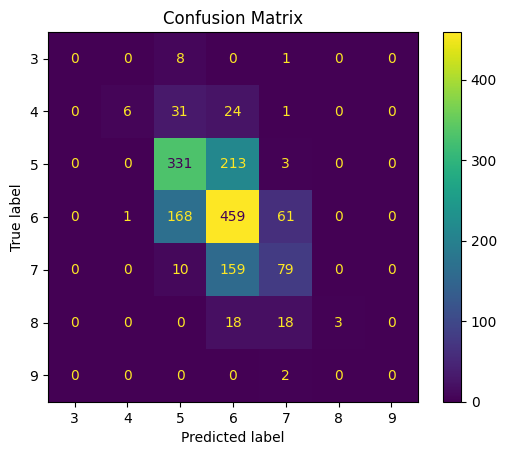

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# plot_confusion_matrix(random_forest_model, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(random_forest_model, X_test, y_test)
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, random_forest_model.predict(X_train))
test_acc = accuracy_score(y_test, random_forest_predictions)

print(train_acc)
print(test_acc)

1.0
0.550125313283208


### Use GridSearchCV 

- GridSearch is used for hyperparameter tuning
- Hyperparameter tuning is a process of testing on several parameters during model training and searching for the best hyperparameter for the model
- In order to choose the model that yields the best results, GridSearch will build a model for every possible combination of the supplied hyperparameters
- The range of hyperparameters in GridSearch can be set and it will choose the best model hyperparameters from the range specified
- However, the best model hyperparameters chosen by GridSearch is based on the training accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : range(1, 10)}

In [ ]:
random_forest_model_gs = RandomForestClassifier(random_state = 12345)
random_forest_model_gs_best = GridSearchCV(estimator = random_forest_model_gs, param_grid = param_grid , return_train_score = True)
random_forest_model_gs_best.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=12345),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True)

In [ ]:
random_forest_model_gs_best_params = random_forest_model_gs_best.best_params_
print(random_forest_model_gs_best_params)

{'max_depth': 9}


In [ ]:
random_forest_predictions = random_forest_model_gs_best.predict(X_test)

In [ ]:
print(classification_report(y_test, random_forest_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       1.00      0.03      0.06        62
           5       0.62      0.61      0.62       547
           6       0.52      0.72      0.60       689
           7       0.50      0.23      0.32       248
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         2

    accuracy                           0.56      1596
   macro avg       0.38      0.23      0.23      1596
weighted avg       0.56      0.56      0.52      1596



In [ ]:
print(confusion_matrix(y_test, random_forest_predictions))

[[  0   0   7   1   1   0   0]
 [  0   2  31  28   1   0   0]
 [  0   0 332 212   3   0   0]
 [  0   0 154 494  41   0   0]
 [  0   0   8 182  58   0   0]
 [  0   0   0  27  12   0   0]
 [  0   0   0   1   1   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

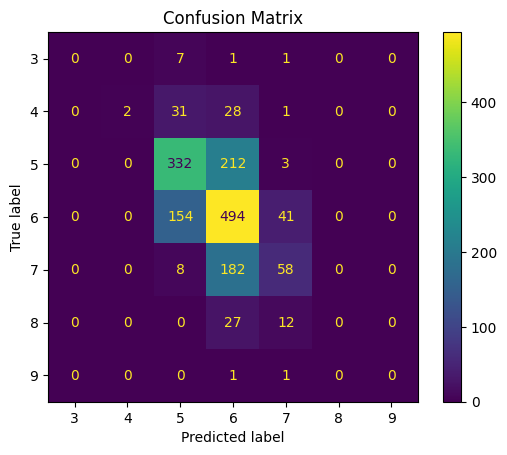

In [ ]:
# plot_confusion_matrix(random_forest_model_gs_best, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(random_forest_model_gs_best, X_test, y_test)
plt.title('Confusion Matrix')

In [ ]:
train_acc = accuracy_score(y_train, random_forest_model_gs_best.predict(X_train))
test_acc = accuracy_score(y_test, random_forest_predictions)

print(train_acc)
print(test_acc)

0.7475832438238453
0.5551378446115288


## Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state = 12345)
decision_tree_model.fit(X_train, y_train)

# try with max_depth to control overfitting
# decision_tree_model = DecisionTreeClassifier(max_depth = 3, random_state = 12345)
# decision_tree_model.fit(X_train, y_train)

# decision_tree_model = DecisionTreeClassifier(max_depth = 5, random_state = 12345)
# decision_tree_model.fit(X_train, y_train)

# decision_tree_model = DecisionTreeClassifier(max_depth = 7, random_state = 12345)
# decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12345)

In [ ]:
decision_tree_predictions = decision_tree_model.predict(X_test)

[Text(0.47042692898798655, 0.9833333333333333, 'x[11] <= -0.455\ngini = 0.674\nsamples = 3724\nvalue = [21, 144, 1205, 1634, 608, 109, 3]'),
 Text(0.1972856760404089, 0.95, 'x[2] <= -0.346\ngini = 0.576\nsamples = 1528\nvalue = [7, 75, 818, 557, 63, 8, 0]'),
 Text(0.08923540349707787, 0.9166666666666666, 'x[2] <= -0.626\ngini = 0.595\nsamples = 634\nvalue = [3, 20, 231, 327, 47, 6, 0]'),
 Text(0.03200949940537656, 0.8833333333333333, 'x[1] <= -0.275\ngini = 0.578\nsamples = 347\nvalue = [2, 8, 93, 202, 36, 6, 0]'),
 Text(0.017367011056535667, 0.85, 'x[10] <= -0.258\ngini = 0.454\nsamples = 159\nvalue = [0, 1, 46, 108, 4, 0, 0]'),
 Text(0.010490140906632282, 0.8166666666666667, 'x[6] <= 0.931\ngini = 0.51\nsamples = 104\nvalue = [0, 1, 38, 62, 3, 0, 0]'),
 Text(0.004196056362652913, 0.7833333333333333, 'x[1] <= -1.424\ngini = 0.44\nsamples = 75\nvalue = [0, 0, 21, 52, 2, 0, 0]'),
 Text(0.003263599393174488, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0, 0]'),
 Text(0.0051285

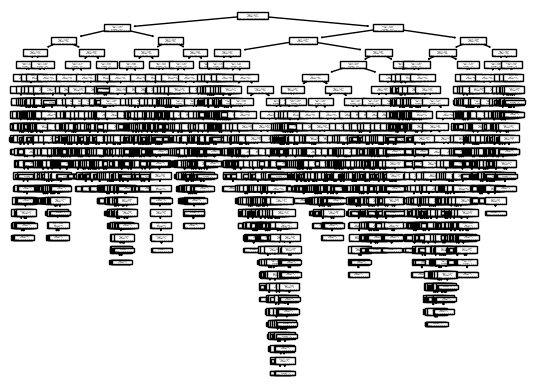

In [ ]:
from sklearn import tree

tree.plot_tree(decision_tree_model)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, decision_tree_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.20      0.23      0.21        62
           5       0.49      0.48      0.49       547
           6       0.48      0.46      0.47       689
           7       0.33      0.38      0.35       248
           8       0.14      0.15      0.15        39
           9       0.00      0.00      0.00         2

    accuracy                           0.44      1596
   macro avg       0.24      0.24      0.24      1596
weighted avg       0.44      0.44      0.44      1596



In [ ]:
print(confusion_matrix(y_test, decision_tree_predictions))

[[  0   1   3   4   1   0   0]
 [  0  14  27  17   3   1   0]
 [  2  31 264 199  44   7   0]
 [  1  19 210 319 124  16   0]
 [  0   4  29 110  93  12   0]
 [  0   0   3  14  16   6   0]
 [  0   0   0   1   1   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

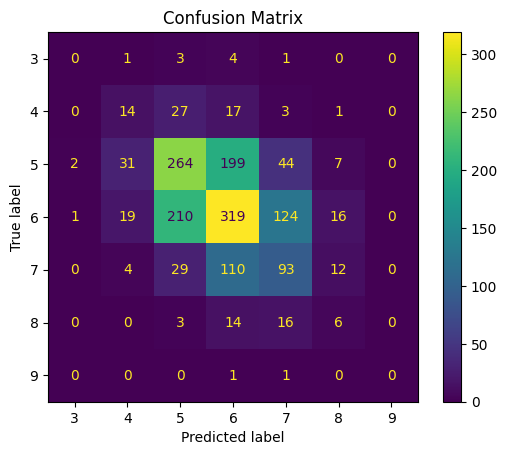

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot_confusion_matrix(decision_tree_model, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test, y_test)
plt.title('Confusion Matrix')

In [ ]:
train_acc = accuracy_score(y_train, decision_tree_model.predict(X_train))
test_acc = accuracy_score(y_test, decision_tree_predictions)

print(train_acc)
print(test_acc)

1.0
0.43609022556390975


### Use GridSearchCV 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : range(1, 10)}

decision_tree_model_gs = DecisionTreeClassifier(random_state = 12345)
decision_tree_model_gs_best = GridSearchCV(estimator = decision_tree_model_gs, param_grid = param_grid , return_train_score = True)
decision_tree_model_gs_best.fit(X_train, y_train)

decision_tree_model_gs_best_params = decision_tree_model_gs_best.best_params_
print(decision_tree_model_gs_best_params)

{'max_depth': 4}


In [ ]:
decision_tree_predictions = decision_tree_model_gs_best.predict(X_test)

In [ ]:
print(classification_report(y_test, decision_tree_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.09      0.02      0.03        62
           5       0.59      0.57      0.58       547
           6       0.49      0.66      0.56       689
           7       0.40      0.22      0.29       248
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         2

    accuracy                           0.52      1596
   macro avg       0.23      0.21      0.21      1596
weighted avg       0.48      0.52      0.49      1596



In [ ]:
print(confusion_matrix(y_test, decision_tree_predictions))

[[  0   1   5   2   1   0   0]
 [  0   1  25  34   2   0   0]
 [  0   5 311 224   7   0   0]
 [  0   3 173 455  58   0   0]
 [  0   1  10 182  55   0   0]
 [  0   0   1  25  13   0   0]
 [  0   0   0   1   1   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

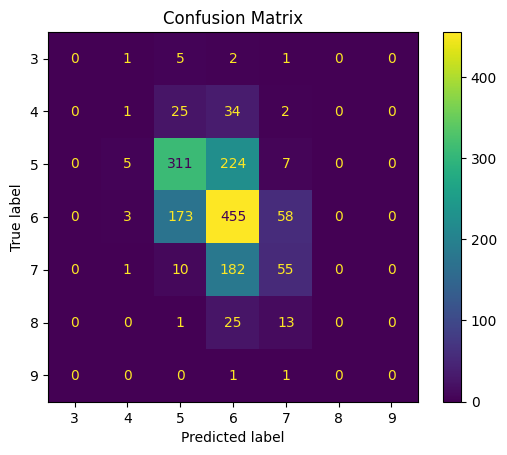

In [ ]:
# plot_confusion_matrix(decision_tree_model_gs_best, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(decision_tree_model_gs_best, X_test, y_test)
plt.title('Confusion Matrix')

In [ ]:
train_acc = accuracy_score(y_train, decision_tree_model_gs_best.predict(X_train))
test_acc = accuracy_score(y_test, decision_tree_predictions)

print(train_acc)
print(test_acc)

0.5671321160042965
0.5150375939849624


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier() # default n_neighbors = 5
knn_model.fit(X_train, y_train)

# knn_model = KNeighborsClassifier(n_neighbors = 3)
# knn_model.fit(X_train, y_train)

# knn_model = KNeighborsClassifier(n_neighbors = 7)
# knn_model.fit(X_train, y_train)

# knn_model = KNeighborsClassifier(n_neighbors = 9)
# knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_predictions = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.17      0.11      0.14        62
           5       0.53      0.60      0.57       547
           6       0.51      0.56      0.53       689
           7       0.41      0.28      0.33       248
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         2

    accuracy                           0.50      1596
   macro avg       0.23      0.22      0.22      1596
weighted avg       0.47      0.50      0.48      1596



In [ ]:
print(confusion_matrix(y_test, knn_predictions))

[[  0   1   5   3   0   0   0]
 [  0   7  30  22   3   0   0]
 [  0  19 330 186  12   0   0]
 [  0  12 223 388  65   1   0]
 [  0   1  30 145  69   3   0]
 [  0   0   3  17  19   0   0]
 [  0   0   0   1   1   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

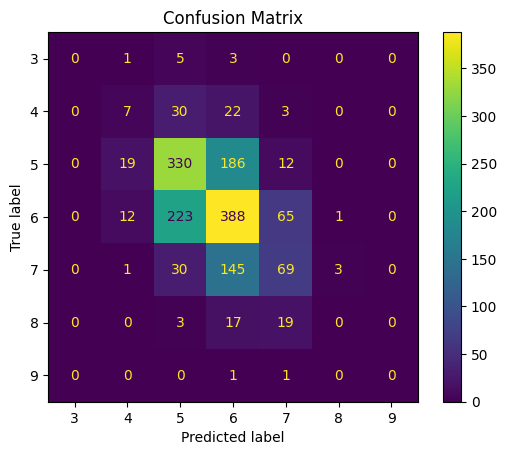

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot_confusion_matrix(knn_model, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.title('Confusion Matrix')

In [ ]:
train_acc = accuracy_score(y_train, knn_model.predict(X_train))
test_acc = accuracy_score(y_test, knn_predictions)

print(train_acc)
print(test_acc)

0.6721267454350162
0.4974937343358396


### Use GridSearchCV 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : range(2, 10)}

In [ ]:
knn_model_gs = KNeighborsClassifier()
knn_model_gs_best = GridSearchCV(estimator = knn_model_gs, param_grid = param_grid , return_train_score = True)
knn_model_gs_best.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 10)}, return_train_score=True)

In [ ]:
knn_model_gs_best_params = knn_model_gs_best.best_params_
print(knn_model_gs_best_params)

{'n_neighbors': 9}


In [ ]:
knn_predictions = knn_model_gs_best.predict(X_test)

In [ ]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.26      0.08      0.12        62
           5       0.55      0.61      0.58       547
           6       0.52      0.61      0.56       689
           7       0.44      0.30      0.36       248
           8       0.29      0.05      0.09        39
           9       0.00      0.00      0.00         2

    accuracy                           0.52      1596
   macro avg       0.30      0.24      0.24      1596
weighted avg       0.50      0.52      0.50      1596



In [ ]:
print(confusion_matrix(y_test, knn_predictions))

[[  0   1   6   2   0   0   0]
 [  0   5  35  21   1   0   0]
 [  0  10 335 191   9   2   0]
 [  0   2 207 418  62   0   0]
 [  0   1  19 151  74   3   0]
 [  0   0   2  15  20   2   0]
 [  0   0   0   1   1   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

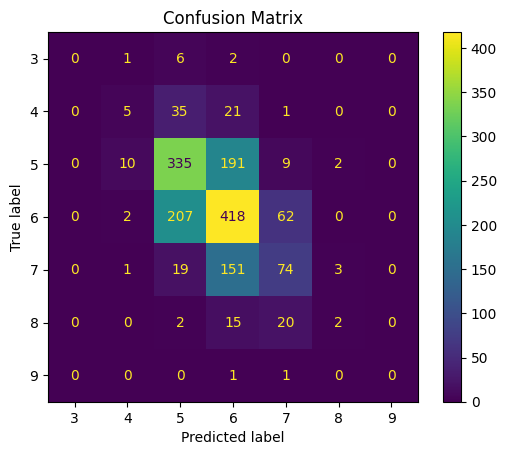

In [ ]:
# plot_confusion_matrix(knn_model_gs_best, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(knn_model_gs_best, X_test, y_test)
plt.title('Confusion Matrix')

In [ ]:
train_acc = accuracy_score(y_train, knn_model_gs_best.predict(X_train))
test_acc = accuracy_score(y_test, knn_predictions)

print(train_acc)
print(test_acc)

0.6377551020408163
0.5225563909774437


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state = 12345) # default solver = 'lbfgs'
log_reg_model.fit(X_train, y_train)

# log_reg_model = LogisticRegression(solver = 'newton-cg', random_state = 12345)
# log_reg_model.fit(X_train, y_train)

# log_reg_model = LogisticRegression(solver = 'liblinear', random_state = 12345)
# log_reg_model.fit(X_train, y_train)

# log_reg_model = LogisticRegression(solver = 'sag', random_state = 12345)
# log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=12345)

Note: 
- Logistic regression does not really have any critical hyperparameters to tune
- Sometimes, you can see useful differences in performance or convergence with different solvers (solver)
- solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
- default = 'lbfgs'

- For small datasets, 'liblinear' is a good choice
- 'sag' and 'saga' are faster for large ones
- For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss
- liblinear' is limited to one-versus-rest schemes

In [ ]:
log_reg_predictions = log_reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, log_reg_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.50      0.05      0.09        62
           5       0.60      0.59      0.59       547
           6       0.50      0.67      0.58       689
           7       0.43      0.23      0.30       248
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         2

    accuracy                           0.53      1596
   macro avg       0.29      0.22      0.22      1596
weighted avg       0.51      0.53      0.50      1596



In [ ]:
print(confusion_matrix(y_test, log_reg_predictions))

[[  0   1   6   2   0   0   0]
 [  0   3  28  31   0   0   0]
 [  0   1 320 222   4   0   0]
 [  0   1 165 465  57   1   0]
 [  0   0  13 177  58   0   0]
 [  0   0   0  24  15   0   0]
 [  0   0   0   0   2   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

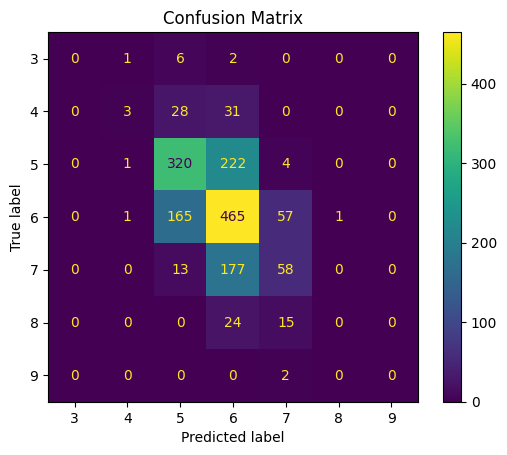

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# plot_confusion_matrix(log_reg_model, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test, y_test)
plt.title('Confusion Matrix')

In [ ]:
train_acc = accuracy_score(y_train, log_reg_model.predict(X_train))
test_acc = accuracy_score(y_test, log_reg_predictions)

print(train_acc)
print(test_acc)

0.5639097744360902
0.5300751879699248


### Use GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'solver' : ['newton-cg','liblinear', 'sag']}

In [ ]:
log_reg_model_gs = LogisticRegression(random_state = 12345)
log_reg_model_gs_best = GridSearchCV(estimator = log_reg_model_gs, param_grid = param_grid , return_train_score = True)
log_reg_model_gs_best.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=12345),
             param_grid={'solver': ['newton-cg', 'liblinear', 'sag']},
             return_train_score=True)

In [ ]:
log_reg_model_gs_best_params = log_reg_model_gs_best.best_params_
print(log_reg_model_gs_best_params)

{'solver': 'newton-cg'}


In [ ]:
log_reg_predictions = log_reg_model_gs_best.predict(X_test)

In [ ]:
print(classification_report(y_test, log_reg_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.43      0.05      0.09        62
           5       0.60      0.58      0.59       547
           6       0.50      0.67      0.58       689
           7       0.42      0.23      0.30       248
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         2

    accuracy                           0.53      1596
   macro avg       0.28      0.22      0.22      1596
weighted avg       0.51      0.53      0.50      1596



In [ ]:
print(confusion_matrix(y_test, log_reg_predictions))

[[  0   1   6   2   0   0   0]
 [  0   3  28  31   0   0   0]
 [  0   2 319 222   4   0   0]
 [  0   1 166 464  57   1   0]
 [  0   0  13 178  57   0   0]
 [  0   0   0  24  15   0   0]
 [  0   0   0   0   2   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

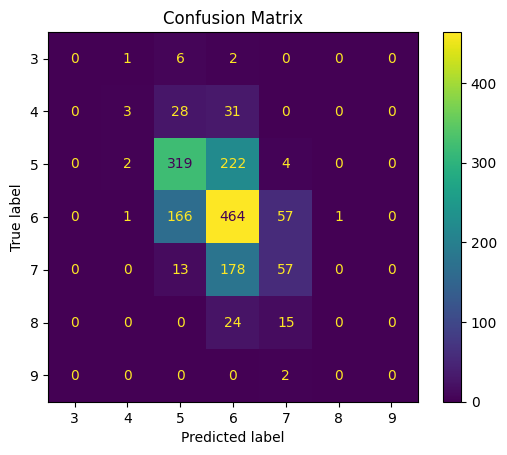

In [ ]:
# plot_confusion_matrix(log_reg_model_gs_best, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(log_reg_model_gs_best, X_test, y_test)
plt.title('Confusion Matrix')

In [ ]:
train_acc = accuracy_score(y_train, log_reg_model_gs_best.predict(X_train))
test_acc = accuracy_score(y_test, log_reg_predictions)

print(train_acc)
print(test_acc)

0.563641245972073
0.5281954887218046


## Dummy Model 

- Find baseline/benchmark

In [ ]:
from sklearn.dummy import DummyClassifier

dclf = DummyClassifier(random_state = 12345)
dclf.fit(X_train, y_train)

DummyClassifier(random_state=12345)

In [ ]:
y_pred = dclf.predict(X_test)

In [ ]:
train_acc = accuracy_score(y_train,dclf.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
print(train_acc)
print(test_acc)

0.4387755102040816
0.4317042606516291


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        62
           5       0.00      0.00      0.00       547
           6       0.43      1.00      0.60       689
           7       0.00      0.00      0.00       248
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         2

    accuracy                           0.43      1596
   macro avg       0.06      0.14      0.09      1596
weighted avg       0.19      0.43      0.26      1596



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[  0   0   0   9   0   0   0]
 [  0   0   0  62   0   0   0]
 [  0   0   0 547   0   0   0]
 [  0   0   0 689   0   0   0]
 [  0   0   0 248   0   0   0]
 [  0   0   0  39   0   0   0]
 [  0   0   0   2   0   0   0]]


Text(0.5, 1.0, 'Confusion Matrix')

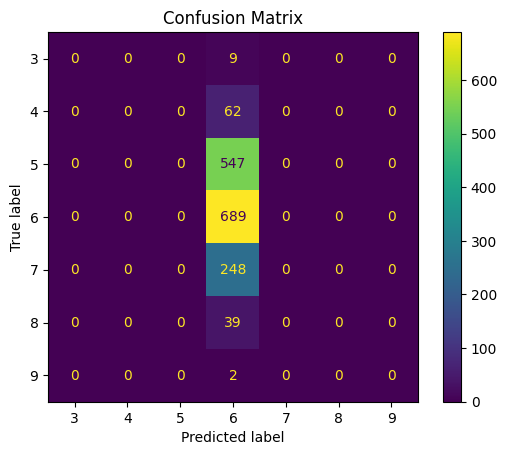

In [ ]:
# plot_confusion_matrix(dclf, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(dclf, X_test, y_test)
plt.title('Confusion Matrix')

# Prediction

In [ ]:
# expected to have 9 quality score

new = [[1, 7, 0.3, 0.35, 4, 0.03, 30, 110, 1, 3.3, 0.45, 11]]
new = sc.transform(new)
pred = knn_model.predict(new)
print(new, pred)

[[ 0.58685972 -0.16003563 -0.25706155  0.21877465 -0.21649128 -0.72129459
   0.00791907 -0.06819556  1.9272492   0.46104558 -0.55721926  0.37576967]] [6]


In [ ]:
# expected to have 3 quality score

new = [[1, 7.9, 0.51, 0.27, 5, 0.079, 39, 120, 1, 3.2, 0.5, 10.1]]
new = sc.transform(new)
pred = knn_model.predict(new)
print(new, pred)

[[ 0.58685972  0.52957021  0.98116587 -0.32482288  0.01389823  0.60099066
   0.51155374  0.10746432  1.9272492  -0.1605364  -0.22441766 -0.38449072]] [5]
